In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [1]:
!pip install ultralytics
import torch

print("CUDA disponível:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("GPU:", torch.cuda.get_device_name(0))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 42.3 MB/s eta 0:00:00
CUDA disponível: True
GPU: Tesla T4


In [2]:
!pip install -q ultralytics==8.3.10
from ultralytics import YOLO
import os, glob, zipfile, shutil, textwrap, yaml
print("Ultralytics instalada.")



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.7/882.7 kB 32.1 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics instalada.


In [3]:
import os
os.environ["WANDB_DISABLED"] = "true"

# Treina no COCO128 (Ultralytics baixa automaticamente)
model = YOLO('yolov8n.pt')  # modelo base pequeno (rápido)
results = model.train(
    data='coco128.yaml',   # baixará automaticamente o dataset
    epochs=10,             # pequeno para teste
    imgsz=640,
    batch=16,
    device=0
)

exp_dir = sorted(glob.glob('runs/detect/train*'))[-1]
best = os.path.join(exp_dir, 'weights', 'best.pt')
print("EXP_DIR:", exp_dir)
print("BEST:", best)


100%|██████████| 6.25M/6.25M [00:00<00:00, 61.3MB/s]


New https://pypi.org/project/ultralytics/8.3.200 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.10 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=coco128.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=

100%|██████████| 6.66M/6.66M [00:00<00:00, 121MB/s]
Unzipping /content/datasets/coco128.zip to /content/datasets/coco128...: 100%|██████████| 263/263 [00:00<00:00, 1602.26file/s]

Dataset download success ✅ (0.8s), saved to /content/datasets



100%|██████████| 755k/755k [00:00<00:00, 33.0MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)


<IPython.core.display.Javascript object>

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: dherek (dhereks) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLO11n...


100%|██████████| 5.35M/5.35M [00:00<00:00, 158MB/s]


AMP: checks passed ✅


train: Scanning /content/datasets/coco128/labels/train2017... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<00:00, 2057.12it/s]

train: New cache created: /content/datasets/coco128/labels/train2017.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.12/dist-packages/ultralytics/data/augment.py:1850: UserWarning: Argument(s) 'quality_lower' are not valid for transform ImageCompression
  A.ImageCompression(quality_lower=75, p=0.0),
val: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.12/dist-packages/ultralytics/data/augment.py:1850: UserWarning: Argument(s) 'quality_lower' are not valid for transform ImageCompression
  A.ImageCompression(quality_lower=75, p=0.0),



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.68G       1.17        5.2        1.2         80        640: 100%|██████████| 8/8 [00:14<00:00,  1.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:15<00:00,  3.85s/it]

                   all        128        929   6.31e-05    0.00954   0.000562   0.000358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.54G      1.102      5.094      1.197        130        640: 100%|██████████| 8/8 [00:02<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.66it/s]

                   all        128        929   6.49e-05    0.00981   0.000641   0.000443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.59G      1.124      5.113      1.201        113        640: 100%|██████████| 8/8 [00:02<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.78it/s]

                   all        128        929   6.53e-05    0.00987   0.000694    0.00049



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.59G      1.091      5.016      1.208        112        640: 100%|██████████| 8/8 [00:01<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.10it/s]

                   all        128        929   6.46e-05    0.00976   0.000792   0.000533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.62G      1.077      5.018      1.191         68        640: 100%|██████████| 8/8 [00:01<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.09it/s]

                   all        128        929   6.71e-05     0.0101   0.000825   0.000602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.56G      1.075          5      1.177         95        640: 100%|██████████| 8/8 [00:02<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.74it/s]

                   all        128        929    6.6e-05    0.00998   0.000887   0.000672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.56G      1.087      4.963      1.172        128        640: 100%|██████████| 8/8 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.98it/s]

                   all        128        929   6.75e-05     0.0102   0.000998   0.000789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.53G      1.069      4.971      1.148         71        640: 100%|██████████| 8/8 [00:01<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.86it/s]

                   all        128        929   6.86e-05     0.0104    0.00114   0.000909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.58G       1.11      4.975      1.183        143        640: 100%|██████████| 8/8 [00:02<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]

                   all        128        929    6.9e-05     0.0104    0.00135     0.0011



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.59G      1.027      4.957      1.138        106        640: 100%|██████████| 8/8 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.09it/s]

                   all        128        929   7.01e-05     0.0106    0.00152    0.00126



10 epochs completed in 0.021 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.7MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.7MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.10 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 186 layers, 2,718,464 parameters, 0 gradients, 7.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.55it/s]


                   all        128        929   7.01e-05     0.0106    0.00152    0.00127
                person         61        254    0.00497      0.752      0.108     0.0898
               bicycle          3          6          0          0          0          0
                   car         12         46          0          0          0          0
            motorcycle          4          5          0          0          0          0
              airplane          5          6          0          0          0          0
                   bus          5          7          0          0          0          0
                 train          3          3          0          0          0          0
                 truck          5         12          0          0          0          0
                  boat          2          6          0          0          0          0
         traffic light          4         14          0          0          0          0
             stop sig

lr/pg0,▁▄▆▇██▇▆▄▂
lr/pg1,▁▄▆▇██▇▆▄▂
lr/pg2,▁▄▆▇██▇▆▄▂
metrics/mAP50(B),▁▂▂▃▃▃▄▅▇█
metrics/mAP50-95(B),▁▂▂▂▃▃▄▅▇█
metrics/precision(B),▁▁█▁██████
metrics/recall(B),▁▃▃▂▅▄▅▇▇█
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
+6,...


EXP_DIR: runs/detect/train
BEST: runs/detect/train/weights/best.pt


In [6]:
import os, glob
from ultralytics import YOLO

# melhor peso do treino (ajuste se preciso)
best = sorted(glob.glob('runs/detect/train*/weights/best.pt'))[-1]
infer_model = YOLO(best)

# tente localizar automaticamente a pasta de validação
candidates = [
    "/content/datasets/coco128/images/val",
    "/content/datasets/coco128/images/val2017",
    "/content/datasets/coco128/images/train",   # fallback
]
val_dir = next((p for p in candidates if os.path.exists(p)), None)
print("Usando para predição:", val_dir)

# se ainda não existir, force o download do coco128:
if val_dir is None:
    !yolo detect train data=coco128.yaml epochs=1 imgsz=640 batch=16 device=0
    # depois do download, tente de novo
    val_dir = next((p for p in candidates if os.path.exists(p)), None)
    print("Após forçar download, usando:", val_dir)

# rodar predição
pred = infer_model.predict(source=val_dir, imgsz=640, conf=0.25, save=True)
!ls -la runs/detect/predict*/ | head -n 20


Usando para predição: None
New https://pypi.org/project/ultralytics/8.3.200 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.10 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=coco128.yaml, epochs=1, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, s

In [7]:
# Salvar resultados no Drive
dest_dir = "/content/drive/MyDrive/YOLO_Projeto_COCO128"
os.makedirs(dest_dir, exist_ok=True)
!cp -r runs/detect/* "{dest_dir}"
print("Copiado para:", dest_dir)


Copiado para: /content/drive/MyDrive/YOLO_Projeto_COCO128


In [8]:
import os, glob
from ultralytics import YOLO

# carregar melhor modelo treinado
best = sorted(glob.glob('runs/detect/train*/weights/best.pt'))[-1]
infer_model = YOLO(best)

# procurar automaticamente a pasta correta
candidates = [
    "/content/datasets/coco128/images/val",
    "/content/datasets/coco128/images/val2017",
    "/content/datasets/coco128/images/train",   # fallback
]
val_dir = next((p for p in candidates if os.path.exists(p)), None)
print("Usando para predição:", val_dir)

# rodar predição
pred = infer_model.predict(source=val_dir, imgsz=640, conf=0.25, save=True)

# listar saídas
!ls -la runs/detect/predict*/ | head -n 20


Usando para predição: None
WARNING ⚠️ 'source' is missing. Using 'source=/usr/local/lib/python3.12/dist-packages/ultralytics/assets'.

image 1/2 /usr/local/lib/python3.12/dist-packages/ultralytics/assets/bus.jpg: 640x480 4 persons, 1 bus, 27.0ms
image 2/2 /usr/local/lib/python3.12/dist-packages/ultralytics/assets/zidane.jpg: 384x640 2 persons, 1 tie, 25.4ms
Speed: 2.5ms preprocess, 26.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict2
runs/detect/predict/:
total 456
drwxr-xr-x 2 root root   4096 Sep 16 21:39 .
drwxr-xr-x 6 root root   4096 Sep 16 21:40 ..
-rw-r--r-- 1 root root 329855 Sep 16 21:39 bus.jpg
-rw-r--r-- 1 root root 123662 Sep 16 21:39 zidane.jpg

runs/detect/predict2/:
total 516
drwxr-xr-x 2 root root   4096 Sep 16 21:40 .
drwxr-xr-x 6 root root   4096 Sep 16 21:40 ..
-rw-r--r-- 1 root root 364046 Sep 16 21:40 bus.jpg
-rw-r--r-- 1 root root 154888 Sep 16 21:40 zidane.jpg


Saving ads.jpg to ads.jpg
Saving images.jpg to images.jpg
Saving model-banner-25112024-mobile-v1-1024x1024.png to model-banner-25112024-mobile-v1-1024x1024.png

image 1/15 /content/my_images/000000000802.jpg: 640x448 1 oven, 1 refrigerator, 15.0ms
image 2/15 /content/my_images/000000001296.jpg: 640x448 3 persons, 1 cell phone, 7.8ms
image 3/15 /content/my_images/000000002431.jpg: 640x480 2 persons, 1 wine glass, 3 cups, 1 knife, 1 spoon, 1 bowl, 1 chair, 2 dining tables, 8.2ms
image 4/15 /content/my_images/000000002685.jpg: 576x640 6 persons, 9.7ms
image 5/15 /content/my_images/000000005600.jpg: 384x640 1 cup, 1 spoon, 2 bowls, 4 oranges, 1 dining table, 8.0ms
image 6/15 /content/my_images/000000006771.jpg: 448x640 10 persons, 10.1ms
image 7/15 /content/my_images/000000007818.jpg: 448x640 1 chair, 1 vase, 7.3ms
image 8/15 /content/my_images/000000007888.jpg: 640x640 2 clocks, 8.9ms
image 9/15 /content/my_images/000000008277.jpg: 640x640 1 fork, 1 bowl, 8.3ms
image 10/15 /content/my_ima

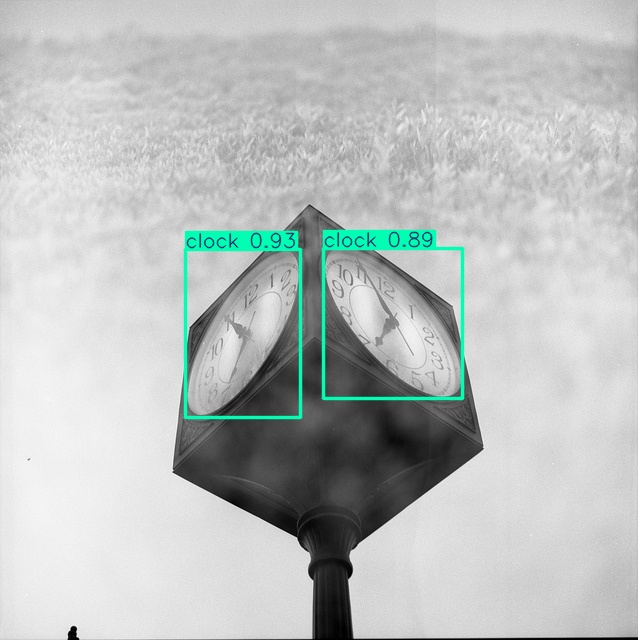

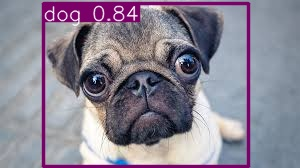

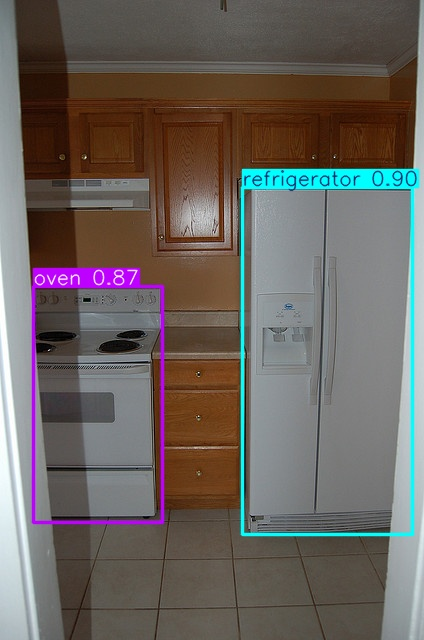

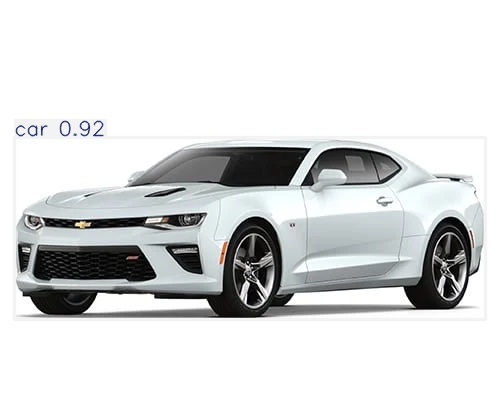

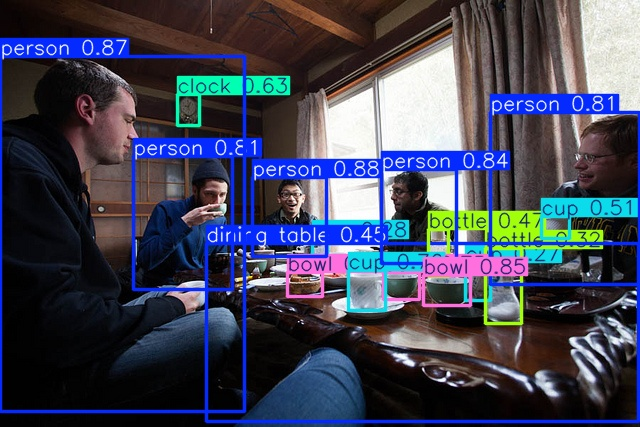

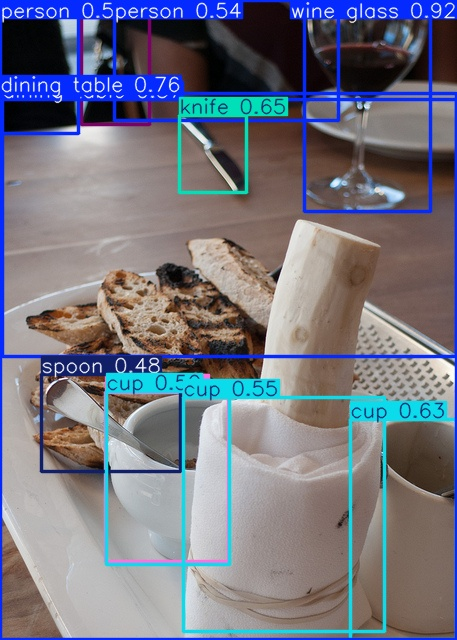

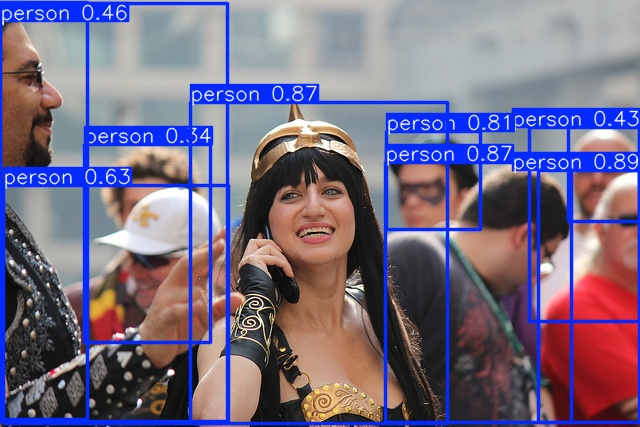

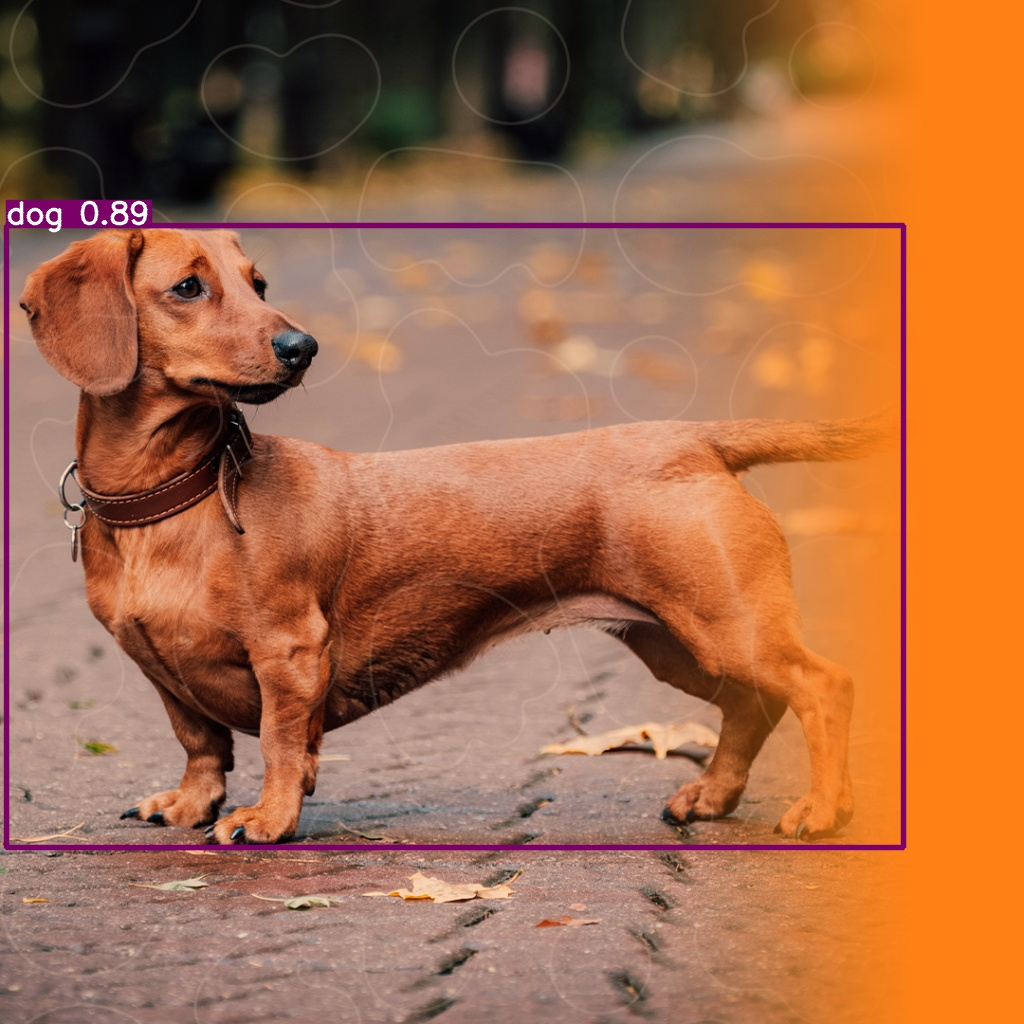

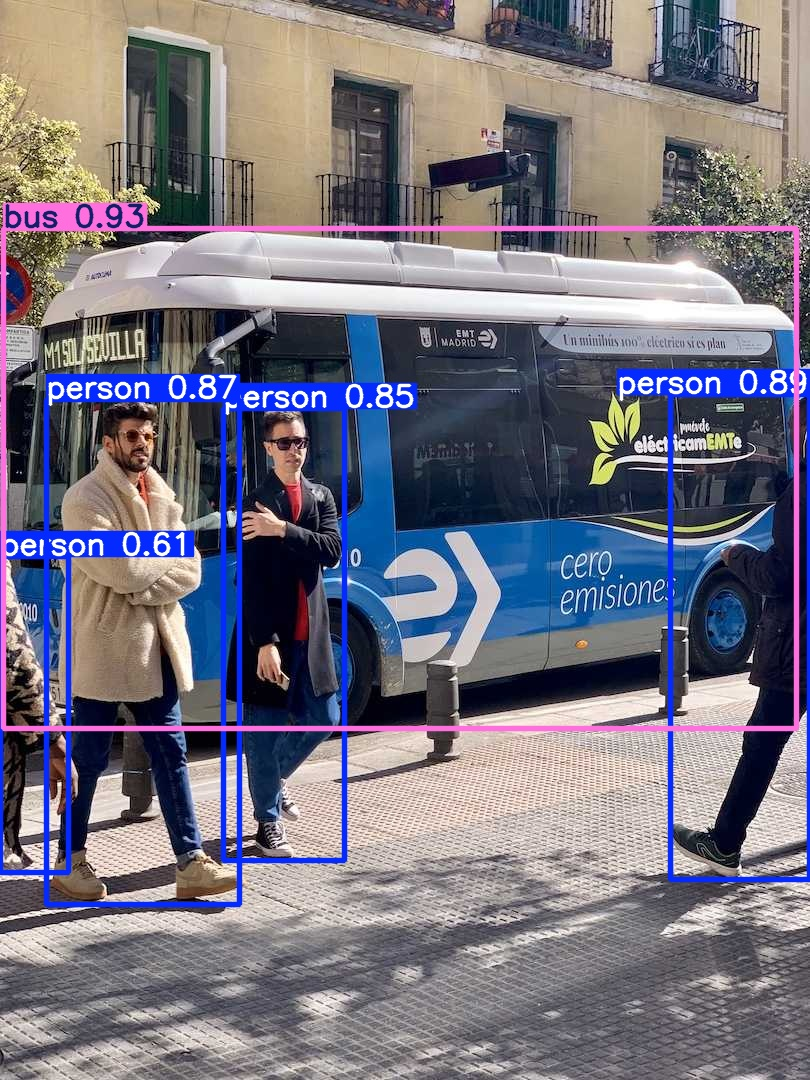

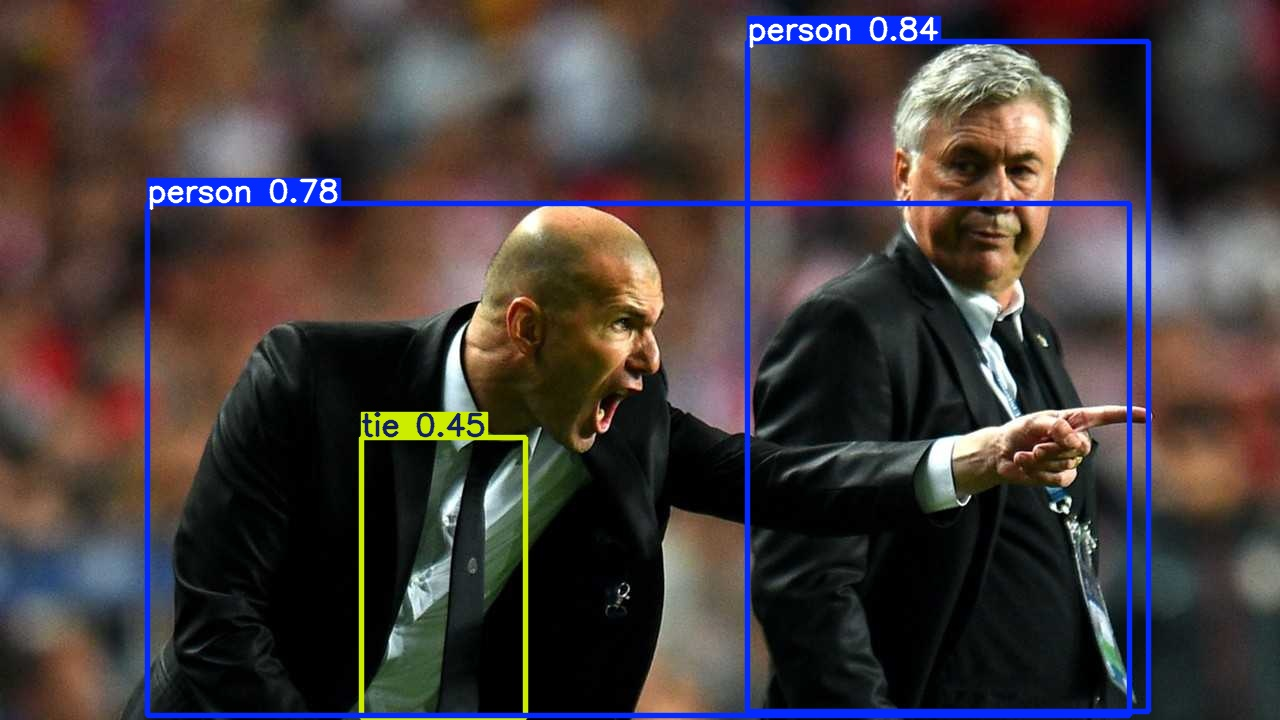

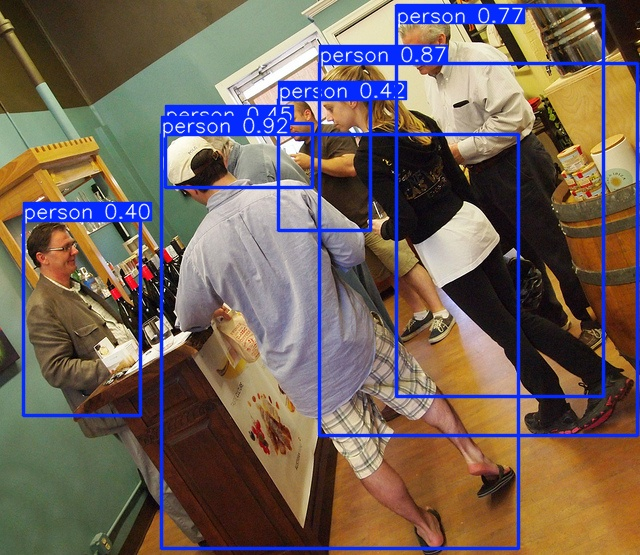

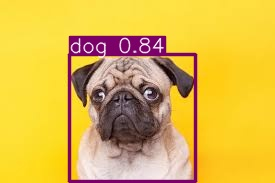

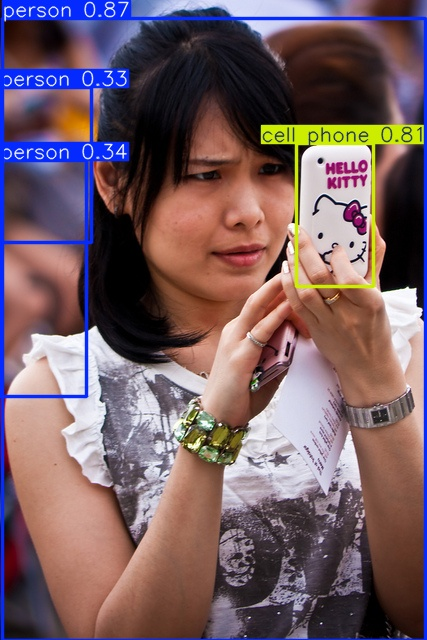

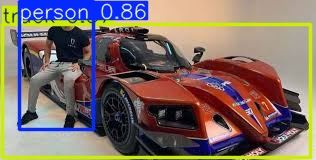

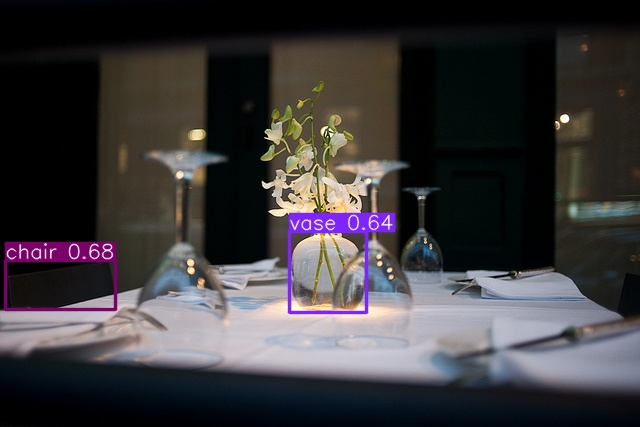

In [12]:
# criar pasta para imagens próprias
!mkdir -p /content/my_images

# exemplo: enviar imagem do computador (no Colab -> Arquivos -> Upload)
from google.colab import files
uploaded = files.upload()  # escolha uma imagem do seu PC

# mover para pasta
import shutil
for filename in uploaded.keys():
    shutil.move(filename, "/content/my_images/" + filename)

# rodar predição em suas imagens
pred = infer_model.predict(source="/content/my_images", imgsz=640, conf=0.25, save=True)

# mostrar primeiras imagens resultantes
import glob
from IPython.display import Image, display

result_imgs = glob.glob("runs/detect/predict*/**.jpg", recursive=True)
for img_path in result_imgs[:15]:  # mostra só 15 resultados
    display(Image(filename=img_path, width=600))
